# Rasterize and vectorize

## 1. Example on dummy data

In [1]:
from spatialdata.datasets import blobs

sdata=blobs(length=1000, n_channels=3)

/Users/arnedf/miniconda3/envs/harpy/lib/python3.10/site-packages/anndata/_core/anndata.py:430: FutureWarning: The dtype argument is deprecated and will be removed in late 2024.
  warnings.warn(
/Users/arnedf/miniconda3/envs/harpy/lib/python3.10/site-packages/spatialdata/models/models.py:1018: UserWarning: Converting `region_key: region` to categorical dtype.
  return convert_region_column_to_categorical(adata)


In [2]:
import harpy as hp

sdata = hp.sh.vectorize(
    sdata,
    labels_layer="blobs_labels",
    output_layer="blobs_labels_boundaries",
    overwrite=True,
)

sdata = hp.im.rasterize(
    sdata,
    shapes_layer="blobs_labels_boundaries",
    output_layer="blobs_labels_redo",
    chunks=1000,
    overwrite=True,
)

sdata = hp.sh.vectorize(
    sdata,
    labels_layer="blobs_labels_redo",
    output_layer="blobs_labels_boundaries_redo",
    overwrite=True,
)

2024-11-05 13:38:31,166 - harpy.shape._manager - INFO - Finished vectorizing. Dissolving shapes at the border of the chunks. This can take a couple minutes if input mask contains a lot of chunks.
2024-11-05 13:38:31,175 - harpy.shape._manager - INFO - Dissolve is done.
2024-11-05 13:38:31,178 - harpy.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-11-05 13:38:32,577 - harpy.image._manager - INFO - Writing results to layer 'blobs_labels_redo'
2024-11-05 13:38:32,599 - harpy.shape._manager - INFO - Finished vectorizing. Dissolving shapes at the border of the chunks. This can take a couple minutes if input mask contains a lot of chunks.
2024-11-05 13:38:32,606 - harpy.shape._manager - INFO - Dissolve is done.


In [3]:
import numpy as np

assert np.array_equal( sdata[ "blobs_labels" ].data.compute(), sdata[ "blobs_labels_redo" ].data.compute() )
assert sdata[ "blobs_labels_boundaries" ].geometry.equals(  sdata[ "blobs_labels_boundaries_redo" ].geometry )

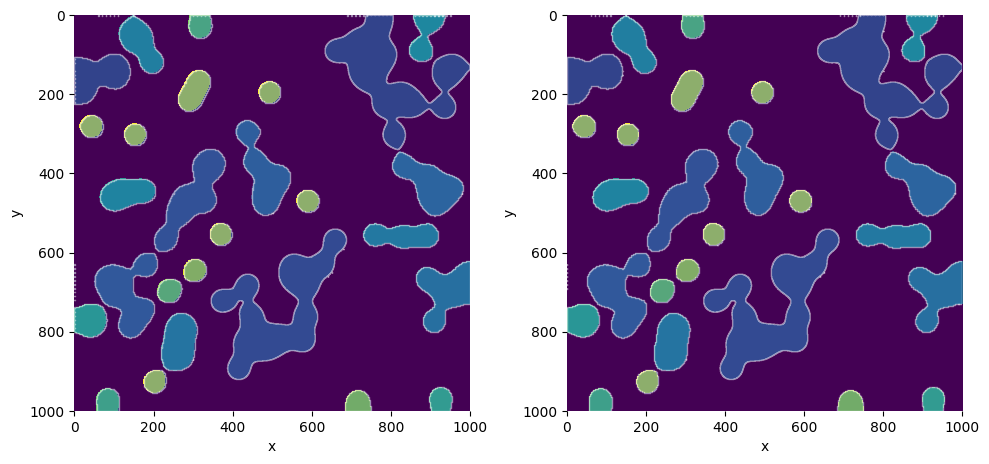

In [4]:
hp.pl.plot_shapes( sdata, labels_layer=["blobs_labels", "blobs_labels_redo"], shapes_layer=["blobs_labels_boundaries", "blobs_labels_boundaries_redo"], figsize=( 10,10 ) )

## 2. Example on MERSCOPE data.

In [5]:
sdata=hp.datasets.merscope_segmentation_masks_example()

/Users/arnedf/miniconda3/envs/harpy/lib/python3.10/site-packages/zarr/creation.py:614: UserWarning: ignoring keyword argument 'read_only'
  compressor, fill_value = _kwargs_compat(compressor, fill_value, kwargs)


2024-11-05 13:39:28,949 - harpy.shape._manager - INFO - Finished vectorizing. Dissolving shapes at the border of the chunks. This can take a couple minutes if input mask contains a lot of chunks.
2024-11-05 13:40:29,705 - harpy.shape._manager - INFO - Dissolve is done.


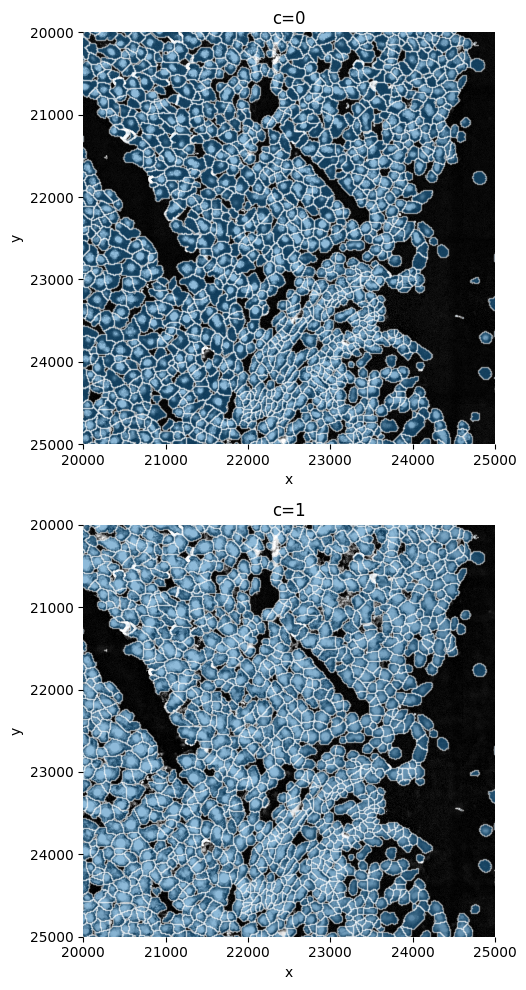

2024-11-05 13:40:36,762 - harpy.image._manager - WARNING - No dims parameter specified. Assuming order of dimension of provided array is ((c), (z), y, x)
2024-11-05 13:42:35,826 - harpy.image._manager - INFO - Writing results to layer 'segmentation_mask_full_redo'


In [6]:
import dask

labels_layer = "segmentation_mask_full"
shapes_layer = "segmentation_mask_full_boundaries"

dask.config.set(scheduler='processes')

# takes 1m40 on mac m2
sdata=hp.sh.vectorize(
    sdata,
    labels_layer=labels_layer,
    output_layer=shapes_layer,
    overwrite=True,
      )

hp.pl.plot_shapes(
    sdata,
    img_layer="clahe",
    shapes_layer=shapes_layer,
    crd = [ 20000, 25000, 20000, 25000 ],
    figsize=(10,10),
      )

# latter code consumes a lot of ram because sdata is not backed in this example.
# back sdata to zarr store for low ram consumption

# set to threads for efficient processing, or define a dask client using few workers and threads.
#dask.config.set(scheduler='threads')

# takes around 1m30 on mac m2
#sdata = harpy.im.rasterize(
#    sdata,
#    shapes_layer=shapes_layer,
#    output_layer=labels_layer + "_redo",
#    chunks = 5000,
#    overwrite=True,
#      )
